In [1]:
from tensorflow.keras import backend
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from Code import utilities as ut
from Code import pix2pix as model
from tensorflow.keras.models import load_model
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
#user input
input_shape = (64, 64, 1)
batch_size = 32 #32
n_epoch = 100 #1
n_filters = 16 #8
comment = 'original_W13'
saveModel = 'B' + str(batch_size) + '_FS' + str(n_filters) + '_E' + str(n_epoch) + comment #name of the saved model

In [3]:
#loading dataset, saved generative model, and respective loss
loaded_d_model = load_model('./models/pix2pix/' + saveModel +'/d' '.h5')
loaded_g_model = load_model('./models/pix2pix/' + saveModel +'/g' '.h5')
loaded_c_model = load_model('./models/pix2pix/' + saveModel +'/composite' '.h5')
loaded_loss = np.load('./models/pix2pix/' + saveModel + '/loss' '.npy')
data = np.load('train_set_marm_100-30.npy')   
#Processing
focused, defocused = ut.dataProcess(data)     #process dataset
m = model.pix2pix(input_shape, n_filters)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
input_real shape:  (1800, 64, 64, 1)
input_cond shape:  (1800, 64, 64, 1)


In [ ]:
#Data inspection: plot processed dataset (focused and defocused)
#ut.plotInput(focused,defocused)

In [ ]:
#Data inspection: plot processed dataset (focused and defocused)
#ut.plotGen(defocused,5)

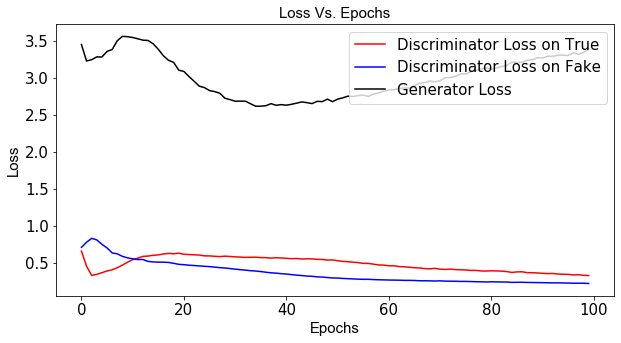

In [4]:
#Plot trained model loss
ut.plotLoss(loaded_loss,0)
#plot two scales in one plot? or two subplots?

In [ ]:
#Plot trained model loss
ut.plotLossP2P(loaded_loss,0)
#plot two scales in one plot? or two subplots?

In [7]:
y_fake_G = loaded_g_model.predict(defocused[0:100,:,:,:])

In [ ]:
defocused.shape

In [ ]:
np.max(focused[0,:,:,0])

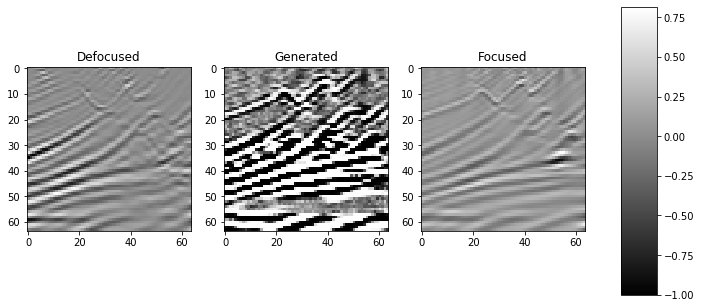

In [47]:
#Plot trained model loss
ut.plotCompareOne(defocused, y_fake_G, focused)

In [ ]:
idx = randint(0,50)
fontsize = 15
plt.plot(y_fake_G[0,:,idx,0]/np.max(abs(y_fake_G[0,:,:,0])),'--r')
plt.plot(focused[0,:,idx,0]/np.max(abs(focused[0,:,:,0])),'k')
plt.plot(defocused[0,:,idx,0]/np.max(abs(defocused[0,:,:,0])),'b')
plt.legend(['Generated','Focused','Defocused'])
plt.xlabel('Pixel number', fontsize=fontsize)
plt.ylabel('amplitude number', fontsize=fontsize)
plt.title('Random trace', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

In [ ]:
from scipy.stats import pearsonr
from numpy import zeros

In [ ]:
a = y_fake_G[0,:,:,:]/np.max(abs(y_fake_G[0,:,:,:]))
a.shape

In [ ]:
y_fake_G.shape

In [ ]:
c1_x,c2_x = corrceff_x(y_fake_G, focused[0:100], defocused[0:100])
c1_y,c2_y = corrceff_y(y_fake_G, focused[0:100], defocused[0:100])

In [ ]:
def corrceff_y(y_fake_G, focused, defocused):
    c = np.zeros((focused.shape[1]))
    c2 = np.zeros((focused.shape[1]))
    c_ex = np.zeros((focused.shape[0]))
    c_ex_2 = np.zeros((focused.shape[0]))
    for j in range((focused.shape[0])):
        y_fake_G_temp = y_fake_G[j,:,:,:]/np.max(abs(y_fake_G[j,:,:,:]))
        focused_temp = focused[j,:,:,:]/np.max(abs(focused[j,:,:,:]))
        defocused_temp = defocused[j,:,:,:]/np.max(abs(defocused[j,:,:,:]))
        for i in range(focused.shape[1]):
            c[i],_= pearsonr(y_fake_G_temp[:,i,0],focused_temp[:,i,0])
            c2[i],_= pearsonr(defocused_temp[:,i,0],focused_temp[:,i,0])
        c_ex[j] = np.mean(c)
        c_ex_2[j] = np.mean(c2)
    return c_ex, c_ex_2

In [ ]:
def corrceff_x(y_fake_G, focused, defocused):
    c = np.zeros((focused.shape[1]))
    c2 = np.zeros((focused.shape[1]))
    c_ex = np.zeros((focused.shape[0]))
    c_ex_2 = np.zeros((focused.shape[0]))
    for j in range((focused.shape[0])):
        for i in range(focused.shape[1]):
            c[i],_= pearsonr(y_fake_G[j,i,:,0],focused[j,i,:,0])
            c2[i],_= pearsonr(defocused[j,i,:,0],focused[j,i,:,0])
        c_ex[j] = np.mean(c)
        c_ex_2[j] = np.mean(c2)
    return c_ex, c_ex_2

In [ ]:
data = [c1_y,c1_x,c2_y,c2_x]
data = np.array(data)
data = np.transpose(data)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
fontsize = 15
ax.boxplot(data, 0, '')
ax.set_title('Boxplot of Correlation Coefficent',fontsize = fontsize)
ax.set_ylabel('Correlation Coefficent',fontsize = fontsize)
ax.tick_params(axis="x", labelsize=fontsize)
ax.tick_params(axis="y", labelsize=fontsize)



plt.show()

In [ ]:
c,_= pearsonr(y_fake_G[0,idx,:,0],focused[0,idx,:,0])

In [ ]:
c

In [ ]:
loaded_dG_model.summary()

In [ ]:
d = loaded_dG_model.predict(y_fake_G)

In [ ]:
d.shape

In [ ]:
idx = randint(0,d.shape[0])
plt.imshow(d[idx,:,:,0]); plt.colorbar()